# Cleaning/Formatting Flat File Source

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
#Pull in the flat file source
df_covid = pd.read_csv('corona_latest.csv')
df_covid.head()

,Unnamed: 0,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
0,0,USA,560433,133,22115.0,10.0,32634.0,505684,11766.0,1693.0,67.0,2833112.0,8559.0
1,1,Spain,166831,0,17209.0,0.0,62391.0,87231,7371.0,3568.0,368.0,600000.0,12833.0
2,2,Italy,156363,0,19899.0,0.0,34211.0,102253,3343.0,2586.0,329.0,1010193.0,16708.0
3,3,France,132591,0,14393.0,0.0,27186.0,91012,6845.0,2031.0,221.0,333807.0,5114.0
4,4,Germany,127854,0,3022.0,0.0,64300.0,60532,4895.0,1526.0,36.0,1317887.0,15730.0


In [6]:
#Transformation 1 - I'm going to remove the Unnamed column as it's currently adding no value to the rest of the data
#Had troubles dropping at first because I didn't have the full column name right so I iterated over the column names to get a list of them
for col in df_covid.columns: 
    print(col) 
#After getting the correct names I was able to successfully drop the column name that wasn't needed
df_covid = df_covid.drop(columns = ['Unnamed: 0'])
df_covid.head()

Unnamed: 0
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/ 1M pop


,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
0,USA,560433,133,22115.0,10.0,32634.0,505684,11766.0,1693.0,67.0,2833112.0,8559.0
1,Spain,166831,0,17209.0,0.0,62391.0,87231,7371.0,3568.0,368.0,600000.0,12833.0
2,Italy,156363,0,19899.0,0.0,34211.0,102253,3343.0,2586.0,329.0,1010193.0,16708.0
3,France,132591,0,14393.0,0.0,27186.0,91012,6845.0,2031.0,221.0,333807.0,5114.0
4,Germany,127854,0,3022.0,0.0,64300.0,60532,4895.0,1526.0,36.0,1317887.0,15730.0


In [7]:
#Currently it looks like my dataframe is ordered by number of new cases. I think to be less biased regarding the data I'd want to sort it by country in alphabetic order
df_covid.sort_values(['Country,Other'], axis = 0, ascending = True, inplace = True)
df_covid.head()
#Now my dataframe is sorted alphabetically by country instead of looking at newest cases

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
85,Afghanistan,607,0,19.0,1.0,32.0,556,0.0,16.0,0.50,0.0,0.0
93,Albania,446,0,23.0,0.0,217.0,206,7.0,155.0,8.00,3877.0,1347.0
54,Algeria,1914,0,293.0,0.0,591.0,1030,60.0,44.0,7.00,3359.0,77.0
81,Andorra,638,0,29.0,0.0,128.0,481,17.0,8257.0,375.00,1673.0,21653.0
167,Angola,19,0,2.0,0.0,4.0,13,0.0,0.6,0.06,0.0,0.0


In [8]:
#Need to reset the index as my values are listed out how they were originally. For example, 85 for Afghanistan
df_covid = df_covid.reset_index(drop = True)
df_covid.head()
#Now my rows are ordered by country instead of new cases like before.

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop
0,Afghanistan,607,0,19.0,1.0,32.0,556,0.0,16.0,0.50,0.0,0.0
1,Albania,446,0,23.0,0.0,217.0,206,7.0,155.0,8.00,3877.0,1347.0
2,Algeria,1914,0,293.0,0.0,591.0,1030,60.0,44.0,7.00,3359.0,77.0
3,Andorra,638,0,29.0,0.0,128.0,481,17.0,8257.0,375.00,1673.0,21653.0
4,Angola,19,0,2.0,0.0,4.0,13,0.0,0.6,0.06,0.0,0.0


In [9]:
#Now I'm going to hope there are no duplicates here, but I want to check just in case because that could easily inflate numbers per country.
for c in df_covid.columns:
    dup = df_covid[c].duplicated().sum()
    if dup>0:
        print("{} has {} duplicate value(s)".format(c,dup))
    else:
        print("{} has no duplicate values".format(c))
        
#Now I'm not worried about my columns that contain integers having duplicate values it's really the Country,Other column that was the biggest issue. However, I thought the exercise was valuable enough to do to all for practice.

Country,Other has no duplicate values
TotalCases has 39 duplicate value(s)
NewCases has 188 duplicate value(s)
TotalDeaths has 132 duplicate value(s)
NewDeaths has 204 duplicate value(s)
TotalRecovered has 84 duplicate value(s)
ActiveCases has 44 duplicate value(s)
Serious,Critical has 140 duplicate value(s)
Tot Cases/1M pop has 55 duplicate value(s)
Deaths/1M pop has 154 duplicate value(s)
TotalTests has 54 duplicate value(s)
Tests/ 1M pop has 55 duplicate value(s)


In [10]:
#I want to check for NaN values as this can easily have an effect on data when doing analysis. I can use similar code from above to check through all columns.
for c in df_covid.columns:
    miss = df_covid[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has no missing values".format(c))
#None of my columns contain missing data which is great.

Country,Other has no missing values
TotalCases has no missing values
NewCases has no missing values
TotalDeaths has no missing values
NewDeaths has no missing values
TotalRecovered has no missing values
ActiveCases has no missing values
Serious,Critical has no missing values
Tot Cases/1M pop has no missing values
Deaths/1M pop has no missing values
TotalTests has no missing values
Tests/ 1M pop has no missing values


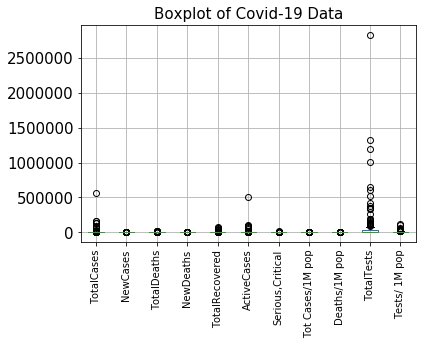

In [11]:
#Visual look for outliers using boxplot.
df_covid.plot.box()
plt.title("Boxplot of Covid-19 Data", fontsize = 15)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize = 15)
plt.grid(True)
#Looking at this I'll need to evaluate TotalTests as that contains obvious outliers. Knowing this data though and what it's covering I wouldn't doubt that this could easily contain accurate outliers as some country's have a lower population and have had better testing overall.


In [12]:
df_covid.to_csv('covid1.csv')